<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Credit_Card_Apply_ADASYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history1 = model1.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 65s 4ms/step - accuracy: 0.9622 - loss: 0.0960 - precision_1: 0.9858 - recall_1: 0.9359 - val_accuracy: 0.9930 - val_loss: 0.0237 - val_precision_1: 0.9926 - val_recall_1: 0.9934
Epoch 2/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9942 - loss: 0.0186 - precision_1: 0.9949 - recall_1: 0.9935 - val_accuracy: 0.9966 - val_loss: 0.0133 - val_precision_1: 0.9949 - val_recall_1: 0.9983
Epoch 3/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9967 - loss: 0.0114 - precision_1: 0.9965 - recall_1: 0.9969 - val_accuracy: 0.9976 - val_loss: 0.0097 - val_precision_1: 0.9969 - val_recall_1: 0.9983
Epoch 4/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9979 - loss: 0.0082 - precision_1: 0.9973 - recall_1: 0.9984 - val_accuracy: 0.9974 - val_loss: 0.0105 - val_precision_1: 0.9953 - val_recall_1: 0.9995
Epoch 5/20
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9984 - loss: 0.0065 - precision_1: 0.

In [9]:
y_pred1 = (model1.predict(X_test_scaled) > 0.5).astype("int32")
print("\nModel 1 Report (ADASYN):")
print(classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Model 1 Report (ADASYN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56860

    accuracy                           1.00    113723
   macro avg       1.00      1.00      1.00    113723
weighted avg       1.00      1.00      1.00    113723

Confusion Matrix:
 [[56778    85]
 [    0 56860]]


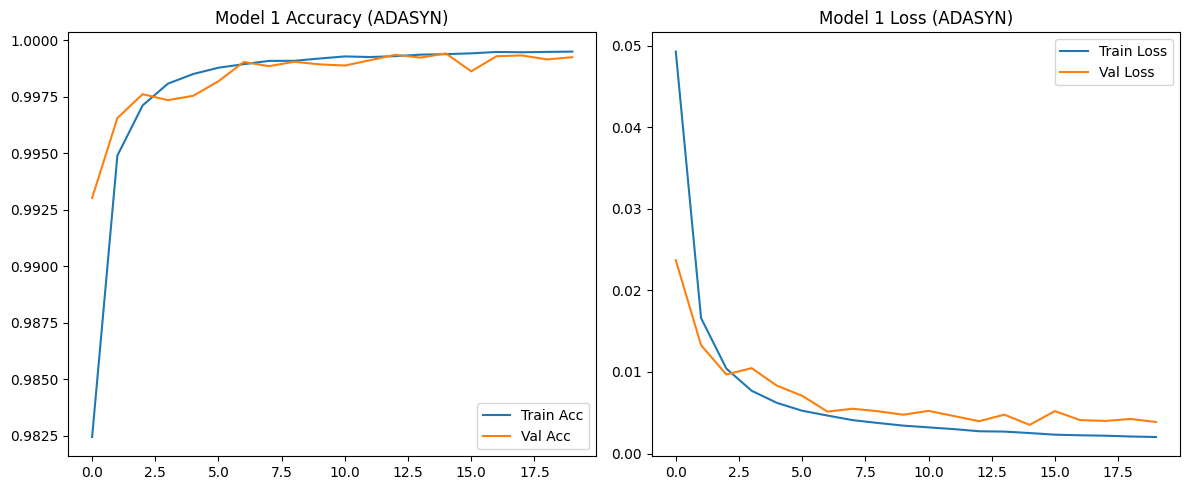

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title('Model 1 Accuracy (ADASYN)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss (ADASYN)')
plt.legend()
plt.tight_layout()
plt.show()